In [1]:
# Import Libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [2]:
# Upload Data

data = pd.read_excel('/Users/ilyasozgur/Desktop/Thesis/Models/Model_for_Thesis/Model_1/Carbon_Analysis/Carbon_Majors_Database_2017_Datasets.xlsx',sheet_name='Scope 1+3')
company_list = pd.read_excel('/Users/ilyasozgur/Desktop/Thesis/Models/Model_for_Thesis/Model_1/Carbon_Analysis/Company_List.xlsx',sheet_name='Summary_New_List')
currency = pd.read_excel('/Users/ilyasozgur/Desktop/Thesis/Models/Model_for_Thesis/Model_1/Carbon_Analysis/Company_List.xlsx',sheet_name='Currency_Rates')
financials = pd.read_excel('/Users/ilyasozgur/Desktop/Thesis/Models/Model_for_Thesis/Model_1/Carbon_Analysis/Financial_Data.xlsx')
financials_2 = pd.read_excel('/Users/ilyasozgur/Desktop/Thesis/Models/Model_for_Thesis/Model_1/Carbon_Analysis/Financial_Data2.xlsx')

In [3]:
# Upload Data2

Energy = pd.read_excel('/Users/ilyasozgur/Desktop/Thesis/Models/Model_for_Thesis/Model_1/Carbon_Analysis/Energy_Data.xlsx')
GDP = pd.read_excel('/Users/ilyasozgur/Desktop/Thesis/Models/Model_for_Thesis/Model_1/Carbon_Analysis/GDP_Global.xlsx')
Population = pd.read_excel('/Users/ilyasozgur/Desktop/Thesis/Models/Model_for_Thesis/Model_1/Carbon_Analysis/Population.xlsx')

In [4]:
# Select the data need for 

data_company = data.iloc[:,:1]
data_columns = data.iloc[:,25:]
data_company = pd.concat([data_company,data_columns],axis=1)

In [5]:
# Rename the columns

data_company = data_company.rename(columns={2012:'GHG_E_2012',2013:'GHG_E_2013',2014:'GHG_E_2014',2015:'GHG_E_2015'})
currency = currency.rename(columns={2012:'Currency_2012',2013:'Currency_2013',2014:'Currency_2014',2015:'Currency_2015'})

In [6]:
# Merge with data and company_list

company_list = company_list.merge(data_company, on='Company', how='left') 
company_list = company_list.merge(financials,on='Company',how='left')
company_list = company_list.merge(currency,on='Currency',how='left')
company_list.drop(columns='US', inplace=True)

In [7]:
# Apply the new currency to financials

company_list['Rev. 2012'] = company_list['Rev. 2012']/company_list['Currency_2012']   
company_list['Rev. 2013'] = company_list['Rev. 2013']/company_list['Currency_2013']   
company_list['Rev. 2014'] = company_list['Rev. 2014']/company_list['Currency_2014']   
company_list['Rev. 2015'] = company_list['Rev. 2015']/company_list['Currency_2015']   

company_list['Profit 2012'] = company_list['Profit 2012']/company_list['Currency_2012'] 
company_list['Profit 2013'] = company_list['Profit 2013']/company_list['Currency_2013'] 
company_list['Profit 2014'] = company_list['Profit 2014']/company_list['Currency_2014'] 
company_list['Profit 2015'] = company_list['Profit 2015']/company_list['Currency_2015'] 

In [8]:
# Drop_Currency Columns 

company_list.drop(columns='Currency_2012', inplace=True)
company_list.drop(columns='Currency_2013', inplace=True)
company_list.drop(columns='Currency_2014', inplace=True)
company_list.drop(columns='Currency_2015', inplace=True)

In [9]:
# Carbon Cost

Carbon_Cost_1 = 30

In [10]:
# Calculate new Analyse_1

company_list['GHG E/Revenue_2012'] = company_list['GHG_E_2012'] / company_list['Rev. 2012']*1000000*Carbon_Cost_1
company_list['GHG E/Revenue_2013'] = company_list['GHG_E_2013'] / company_list['Rev. 2013']*1000000*Carbon_Cost_1
company_list['GHG E/Revenue_2014'] = company_list['GHG_E_2014'] / company_list['Rev. 2014']*1000000*Carbon_Cost_1
company_list['GHG E/Revenue_2015'] = company_list['GHG_E_2015'] / company_list['Rev. 2015']*1000000*Carbon_Cost_1

In [11]:
# Calculate new Analyse_2

company_list['GHG E/Profit 2012'] = company_list['GHG_E_2012'] / company_list['Profit 2012']*1000000*Carbon_Cost_1
company_list['GHG E/Profit 2013'] = company_list['GHG_E_2013'] / company_list['Profit 2013']*1000000*Carbon_Cost_1
company_list['GHG E/Profit 2014'] = company_list['GHG_E_2014'] / company_list['Profit 2014']*1000000*Carbon_Cost_1
company_list['GHG E/Profit 2015'] = company_list['GHG_E_2015'] / company_list['Profit 2015']*1000000*Carbon_Cost_1

In [12]:
# Calculate Analyse_3

company_list['Carbon Expense_2012'] = company_list['GHG_E_2012']*1000000*Carbon_Cost_1
company_list['Carbon Expense_2013'] = company_list['GHG_E_2013']*1000000*Carbon_Cost_1
company_list['Carbon Expense_2014'] = company_list['GHG_E_2014']*1000000*Carbon_Cost_1
company_list['Carbon Expense_2015'] = company_list['GHG_E_2015']*1000000*Carbon_Cost_1

In [13]:
# Calculate Analyse_4

company_list['Profit after Carbon Cost_12'] = company_list['Profit 2012'] - company_list['Carbon Expense_2012']
company_list['Profit after Carbon Cost_13'] = company_list['Profit 2013'] - company_list['Carbon Expense_2013']
company_list['Profit after Carbon Cost_14'] = company_list['Profit 2014'] - company_list['Carbon Expense_2014']
company_list['Profit after Carbon Cost_15'] = company_list['Profit 2015'] - company_list['Carbon Expense_2015']

In [14]:
list_1 = company_list.columns[26:32]

In [15]:
# later i will complete

#for i in company_list.columns:
#    if i in list_1:
#        print(True)

In [16]:
# Decrease Rate for Carbon Emission - Sectoral base

Decrease_Rate = 0.2 

In [17]:
# Calculate Analyse_5

company_list['Profit after Decreased_Carbon_Cost_12'] = company_list['Profit 2012'] - company_list['Carbon Expense_2012']*Decrease_Rate
company_list['Profit after Decreased_Carbon_Cost_13'] = company_list['Profit 2013'] - company_list['Carbon Expense_2013']*Decrease_Rate
company_list['Profit after Decreased_Carbon_Cost_14'] = company_list['Profit 2014'] - company_list['Carbon Expense_2013']*Decrease_Rate
company_list['Profit after Decreased_Carbon_Cost_15'] = company_list['Profit 2015'] - company_list['Carbon Expense_2013']*Decrease_Rate

In [18]:
# Calculate Analyse_5

company_list['Rev/Carbon Cost 2012'] = company_list['Carbon Expense_2012']/company_list['Rev. 2012']*100
company_list['Rev/Carbon Cost 2013'] = company_list['Carbon Expense_2013']/company_list['Rev. 2013']*100
company_list['Rev/Carbon Cost 2014'] = company_list['Carbon Expense_2014']/company_list['Rev. 2014']*100
company_list['Rev/Carbon Cost 2015'] = company_list['Carbon Expense_2015']/company_list['Rev. 2015']*100

In [19]:
#company_list.to_excel('/Users/ilyasozgur/Desktop/test.xlsx')

# Machine Learning Part

# Predict Emission

In [20]:
# Data Preperation

data_prep = data.copy()
data_prep['Check_Validity'] = np.where(data_prep['Company'].isin(company_list['Company']),'Valid','Invalid')
data_prep = data_prep[data_prep['Check_Validity'] == 'Valid']
data_prep = data_prep.reset_index()
data_prep.drop(columns='index',inplace=True)
data_prep.drop(columns='Check_Validity',inplace=True)

In [21]:
# Create list of the firm
list_of_oil_companies = data_prep['Company'].to_list()
list_of_oil_companies[0]

'Anglo American'

In [22]:
# Create datasets for model

rn = 0

for i in range(len(data_prep['Company'])):
    list_of_oil_companies[i] = data_prep.iloc[rn:i+1,]
    list_of_oil_companies[i] = list_of_oil_companies[i].T
    list_of_oil_companies[i] = list_of_oil_companies[i].reset_index()
    len_list = len(list_of_oil_companies[i])
    list_of_oil_companies[i] = list_of_oil_companies[i].iloc[1:len_list,]
    list_of_oil_companies[i] = list_of_oil_companies[i].rename({'index':'Years',i:'Carbon_Emission'}, axis=1)
    list_of_oil_companies[i]['Carbon_Emission'] = list_of_oil_companies[i]['Carbon_Emission'].astype(float)
    list_of_oil_companies[i]['Years'] = list_of_oil_companies[i]['Years'].astype(float)
    list_of_oil_companies[i]['Carbon_Emission'] = list_of_oil_companies[i]['Carbon_Emission'].round(decimals=2)
    rn = rn+1

In [23]:
# Check the types

list_of_oil_companies[2].dtypes

Years              float64
Carbon_Emission    float64
dtype: object

In [24]:
# Upload necessary libararies for ML

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [25]:
list_of_oil_companies[0].head(1)

,Years,Carbon_Emission
1,1988.0,170.9


In [26]:
# Prepare test and train split for model

Company_year = data_prep['Company'].to_list()
Company_emission = data_prep['Company'].to_list()

Company_year_train = data_prep['Company'].to_list()
Company_year_test = data_prep['Company'].to_list()
Carbon_Emission_train = data_prep['Company'].to_list()
Carbon_Emission_test = data_prep['Company'].to_list()

for i in range(len(data_prep['Company'])):
    Company_year[i] = list_of_oil_companies[i]['Years']
    Company_emission[i] = list_of_oil_companies[i]['Carbon_Emission']
    Company_year_train[i], Company_year_test[i], Carbon_Emission_train[i], Carbon_Emission_test[i] = train_test_split(Company_year[i],Company_emission[i],test_size=0.33, random_state=0)
    

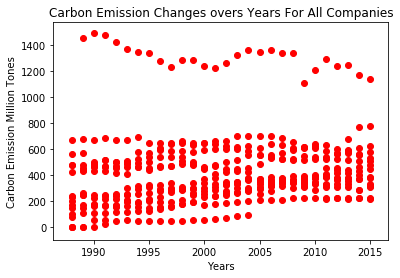

In [27]:
# Visualize the data 

for i in range(len(data_prep['Company'])): 
    plt.scatter(Company_year[i],Company_emission[i],color='red')
    
plt.title('Carbon Emission Changes overs Years For All Companies')

plt.xlabel('Years')
plt.ylabel('Carbon Emission Million Tones')

#plt.legend(loc="upper left")
plt.show()

In [28]:
# Linear Model - Predict Emission

Carbon_Emission_2035 = data_prep['Company'].to_list()

Emission_2035 = pd.DataFrame([], columns =['Emission_2035'])

for i in range(len(data_prep['Company'])):
    
    lr = LinearRegression()
    lr.fit(pd.DataFrame(Company_year_train[i]),pd.DataFrame(Carbon_Emission_train[i]))
    Carbon_Emission_2035[i] = lr.predict([[2035]])
    
    df = pd.DataFrame(Carbon_Emission_2035[i][0], columns=['Emission_2035'])
    
    Emission_2035 = pd.concat([Emission_2035,df])
    
Emission_2035 = Emission_2035.reset_index()
Emission_2035 = Emission_2035.drop(columns='index')

In [29]:
# Emission 2035 

Emission_2035 = pd.concat([data_prep,Emission_2035],axis=1)

In [30]:
Emission_2035 = Emission_2035[['Company','Emission_2035']]

In [31]:
Emission_2035

,Company,Emission_2035
0,Anglo American,281.433748
1,BHP Billiton Ltd,584.231636
2,BP PLC,454.444249
3,Chevron Corp,309.413333
4,China National Petroleum Corp (CNPC),801.139280
5,ConocoPhillips,269.354017
6,ExxonMobil Corp,513.547668
7,Gazprom OAO,1419.955287
8,Kuwait Petroleum Corp,652.750855
9,Lukoil OAO,570.780073


In [32]:
data_emission_2015 = data.copy()

In [33]:
data_emission_2015 = data_emission_2015[['Company',2010,2015]]
data_emission_2015['Validation'] = np.where(data_emission_2015['Company'].isin(Emission_2035['Company']),'Valid','Invalid')
data_emission_2015 = data_emission_2015[data_emission_2015['Validation'] == 'Valid']
data_emission_2015 = data_emission_2015[['Company',2010,2015]]
data_emission_2015 = data_emission_2015.reset_index()
data_emission_2015 = data_emission_2015.drop(columns='index')
data_emission_2015 = data_emission_2015.merge(Emission_2035, on='Company', how='left')
data_emission_2015 = data_emission_2015.rename({'Emission_2035' : 2035},axis=1)

In [34]:
data_emission_2015 = data_emission_2015.sort_values([2010], ascending=False)
data_emission_2015 = data_emission_2015.iloc[:5,:]
data_emission_2015 = data_emission_2015.reset_index()
data_emission_2015.drop(columns='index', inplace=True)

In [35]:
data_emission_2015

,Company,2010,2015,2035
0,Gazprom OAO,1212.744637,1137.706591,1419.955287
1,China National Petroleum Corp (CNPC),641.330373,624.880576,801.139280
2,ExxonMobil Corp,621.127376,577.164250,513.547668
3,Petroleos Mexicanos (Pemex),605.812410,529.882092,731.398681
4,Royal Dutch Shell PLC,539.897660,507.798817,584.524176


In [36]:
data_emission_2015_T = data_emission_2015.T
data_emission_2015_T.columns = data_emission_2015_T.iloc[0]
data_emission_2015_T = data_emission_2015_T[1:]
data_emission_2015_T = data_emission_2015_T.reset_index()
data_emission_2015_T = data_emission_2015_T.rename({'index' : 'Year'},axis=1)

In [37]:
data_emission_2015_T.columns[1:]

Index(['Gazprom OAO', 'China National Petroleum Corp (CNPC)',
       'ExxonMobil Corp', 'Petroleos Mexicanos (Pemex)',
       'Royal Dutch Shell PLC'],
      dtype='object', name='Company')

In [38]:
data_emission_2015_T

Company,Year,Gazprom OAO,China National Petroleum Corp (CNPC),ExxonMobil Corp,Petroleos Mexicanos (Pemex),Royal Dutch Shell PLC
0,2010,1212.74,641.33,621.127,605.812,539.898
1,2015,1137.71,624.881,577.164,529.882,507.799
2,2035,1419.96,801.139,513.548,731.399,584.524


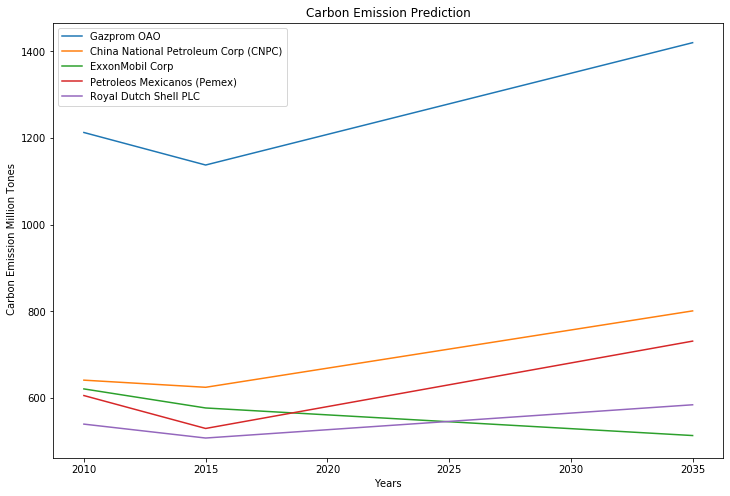

In [39]:
plt.figure(figsize=(12, 8))

for i in data_emission_2015_T.columns[1:]: 
    plt.plot(data_emission_2015_T['Year'],data_emission_2015_T[i], label=i)
       
plt.title('Carbon Emission Prediction')
    
plt.xlabel('Years')
plt.ylabel(' Carbon Emission Million Tones')

plt.legend(loc="upper left")
plt.show()

# Predict Revenue Model Selection

# Data Preperation

In [40]:
data_prep_2 = financials_2.copy()

In [41]:
for i in (Energy.columns):
    Energy[i] = Energy[i].astype(float) 

In [42]:
for i in (GDP.columns):
    GDP[i] = GDP[i].astype(float) 
    
GDP.drop(columns='Year', inplace=True)

In [43]:
for i in (Population.columns):
    Population[i] = Population[i].astype(float) 
    
Population.drop(columns='Year', inplace=True)

In [44]:
additional_features = pd.concat([Energy,GDP,Population],axis=1)
additional_features.drop(columns='Year', inplace=True)
additional_features

,kt of CO2 equivalent,% of Electricity from Renewables,% of Total Energy Use,% of Electricity from Coal,Energy Prices,GDP,GDP Growth (%),Population
0,43582450.0,0.2171,0.8117,0.4028,109.40,75154.0,0.0252,7.125828e+09
1,44233530.0,0.2241,0.8094,0.4104,105.87,77315.0,0.0267,7.210582e+09
2,44438190.0,0.2285,0.8091,0.4049,96.29,79446.0,0.0287,7.295291e+09
3,44423270.0,0.2285,0.7968,0.3917,49.49,75233.0,0.0292,7.379797e+09
4,44550150.0,0.2285,0.7968,0.3917,40.76,76429.0,0.0261,7.464022e+09
5,45117640.0,0.2285,0.7968,0.3917,52.43,81359.0,0.0328,7.547859e+09
6,45873850.0,0.2285,0.7968,0.3917,69.78,86347.0,0.0303,7.631091e+09
7,45873850.0,0.2285,0.7968,0.3917,41.47,87607.0,0.0233,7.713468e+09
8,45873850.0,0.2285,0.7968,0.3917,64.04,84705.0,-0.0360,7.794799e+09


In [45]:
for i in (data_prep_2.columns):
    if i != 'Company':
        data_prep_2[i] = data_prep_2[i].astype(float) 

In [46]:
data_prep_2_rev = data_prep_2.iloc[:,:10]
data_prep_2_pr  = data_prep_2.iloc[:,10:]

In [47]:
data_prep_2_rev = data_prep_2_rev.rename(columns={'Rev. 2012':2012,'Rev. 2013':2013,'Rev. 2014':2014,'Currency_2015':2015,
                                                  'Rev. 2015':2015,'Rev. 2016':2016,'Rev. 2017':2017,'Currency_2018':2018,
                                                  'Rev. 2018':2018,'Rev. 2019':2019,'Rev. 2020':2020})

In [48]:
# Create Seperate Date Frame for each customer

data_prep_2_rev = data_prep_2_rev.iloc[:,1:]
data_prep_2_rev_1 = data_prep_2_rev.iloc[14:15,0:]
data_prep_2_rev_1_T = data_prep_2_rev_1.T
data_prep_2_rev_1_T.reset_index(inplace=True)
data_prep_2_rev_1_T = data_prep_2_rev_1_T.rename({'index':'Years',14:'Rev'}, axis=1)

In [49]:
data_prep_2_rev_1_T

,Years,Rev
0,2012,2.868000e+10
1,2013,2.934200e+10
2,2014,2.707300e+10
3,2015,2.045500e+10
4,2016,2.137800e+10
5,2017,2.624300e+10
6,2018,2.761000e+10
7,2019,2.987000e+10
8,2020,3.090200e+10


# Test and Train Split

In [50]:
data_prep_2_rev_1_T = data_prep_2_rev_1_T.astype(float)
data_prep_2_rev_1_T.dtypes

Years    float64
Rev      float64
dtype: object

# Feature Selection

In [51]:
data_prep_2_rev_1_T = pd.concat([data_prep_2_rev_1_T,additional_features],axis=1)

In [52]:
x = data_prep_2_rev_1_T[['Years','kt of CO2 equivalent','% of Electricity from Renewables','% of Electricity from Coal',
                         'Energy Prices','GDP','Population']]
y  = data_prep_2_rev_1_T['Rev']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

In [54]:
'''
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)
# transform training data
x_train = norm.transform(x_train)


# fit scaler on training data
norm = MinMaxScaler().fit(x_test)
# transform training data
x_test = norm.transform(x_test)
'''
print('')

## Error Functions 

In [55]:
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss

In [56]:
def mae_loss(y_pred, y_true):
    abs_error = np.abs(y_pred - y_true)
    sum_abs_error = np.sum(abs_error)
    loss = sum_abs_error / y_true.size
    return loss

# Model Building 

## Model_1 - Linear Regression

In [57]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# Calculates Error Rates

LR_prediction = lr.predict(x_test)
LR_prediction = pd.DataFrame(LR_prediction, columns=['Prediction_LR'])
LR_prediction = LR_prediction.astype(float)

LR_prediction = pd.concat([LR_prediction,y_test],axis=1)

# MSE

LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['Rev']
LR_prediction['diff'] = LR_prediction['diff'] ** 2
Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size
Sum_Squared_Error_LR = Sum_Squared_Error_LR/100000000000000000000


# MAE

LR_prediction['diff2'] = abs(LR_prediction['Prediction_LR'] - LR_prediction['Rev'])
Sum_Absolute_Error_LR = np.sum(LR_prediction['diff2'])
Sum_Absolute_Error_LR = Sum_Absolute_Error_LR/LR_prediction['diff2'].size
Sum_Absolute_Error_LR = Sum_Absolute_Error_LR/10000000000

In [59]:
predict_lr = lr.predict([[2035,17820060.0,0.65,0.15,180,90000,8500000000]])
predict_lr = int(predict_lr)/1000000000
print('Prediction for the 2035 Revenue is:', predict_lr,'bn $')
print('MSE is', Sum_Squared_Error_LR)
print('MAE', Sum_Absolute_Error_LR)

Prediction for the 2035 Revenue is: 4552.288517397 bn $
MSE is 0.29881644661411044
MAE 0.37961695033125


## Model_2 - SVM Regression

In [60]:
from sklearn import svm

In [61]:
svr_reg = svm.SVR()
svr_reg.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
# Calculates Error Rates

SVM_Prediction = svr_reg.predict(x_test)
SVM_Prediction = pd.DataFrame(SVM_Prediction, columns=['Prediction_SVM'])
SVM_Prediction = SVM_Prediction.astype(float)

SVM_Prediction = pd.concat([SVM_Prediction,y_test],axis=1)

# MSE

SVM_Prediction['diff'] = SVM_Prediction['Prediction_SVM'] - SVM_Prediction['Rev']
SVM_Prediction['diff'] = SVM_Prediction['diff'] ** 2
Sum_Squared_Error_SVM = np.sum(SVM_Prediction['diff'])/SVM_Prediction['diff'].size
Sum_Squared_Error_SVM = Sum_Squared_Error_SVM/100000000000000000000


# MAE

SVM_Prediction['diff2'] = abs(SVM_Prediction['Prediction_SVM'] - SVM_Prediction['Rev'])
Sum_Absolute_Error_SVM = np.sum(SVM_Prediction['diff2'])
Sum_Absolute_Error_SVM = Sum_Absolute_Error_SVM/SVM_Prediction['diff2'].size
Sum_Absolute_Error_SVM = Sum_Absolute_Error_SVM/10000000000

In [63]:
predict_svg = svr_reg.predict([[2035,17820060.0,0.65,0.15,180,90000,8500000000]])
predict_svg = int(predict_svg)/1000000000
print('Prediction for the 2035 Revenue is', predict_svg)
print('MSE is', Sum_Squared_Error_SVM)
print('MAE', Sum_Absolute_Error_SVM)

Prediction for the 2035 Revenue is 26.9265
MSE is 0.01464025625
MAE 0.06405


# Model_3 - DecisionTree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
DT_reg = DecisionTreeRegressor(random_state=0)
DT_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [66]:
# Calculates Error Rates

DTR_Prediction = DT_reg.predict(x_test)
DTR_Prediction = pd.DataFrame(DTR_Prediction, columns=['Prediction_DTR'])
DTR_Prediction = DTR_Prediction.astype(float)

DTR_Prediction = pd.concat([DTR_Prediction,y_test],axis=1)

# MSE

DTR_Prediction['diff'] = DTR_Prediction['Prediction_DTR'] - DTR_Prediction['Rev']
DTR_Prediction['diff'] = DTR_Prediction['diff'] ** 2
Sum_Squared_Error_DTR = np.sum(DTR_Prediction['diff'])/DTR_Prediction['diff'].size
Sum_Squared_Error_DTR = Sum_Squared_Error_DTR/100000000000000000000


# MAE

DTR_Prediction['diff2'] = abs(DTR_Prediction['Prediction_DTR'] - DTR_Prediction['Rev'])
Sum_Absolute_Error_DTR = np.sum(DTR_Prediction['diff2'])
Sum_Absolute_Error_DTR = Sum_Absolute_Error_DTR/DTR_Prediction['diff2'].size
Sum_Absolute_Error_DTR = Sum_Absolute_Error_DTR/10000000000

In [67]:
predict_dtr = DT_reg.predict([[2035,17820060.0,0.65,0.15,180,90000,8500000000]])
predict_dtr = int(predict_dtr)/1000000000
print('Prediction for the 2035 Revenue is', predict_dtr)
print('MSE is', Sum_Squared_Error_DTR)
print('MAE', Sum_Absolute_Error_DTR)

Prediction for the 2035 Revenue is 30.902
MSE is 0.0075517325
MAE 0.056725


# Model_4  - Random Forest Regression

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
RFR = RandomForestRegressor(max_depth=2, random_state=0)
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [70]:
# Calculates Error Rates

RFR_Prediction = RFR.predict(x_test)
RFR_Prediction = pd.DataFrame(RFR_Prediction, columns=['Prediction_RFR'])
RFR_Prediction = RFR_Prediction.astype(float)

RFR_Prediction = pd.concat([RFR_Prediction,y_test],axis=1)

# MSE

RFR_Prediction['diff'] = RFR_Prediction['Prediction_RFR'] - RFR_Prediction['Rev']
RFR_Prediction['diff'] = RFR_Prediction['diff'] ** 2
Sum_Squared_Error_DTR = np.sum(RFR_Prediction['diff'])/DTR_Prediction['diff'].size
Sum_Squared_Error_DTR = Sum_Squared_Error_DTR/100000000000000000000


# MAE

RFR_Prediction['diff2'] = abs(RFR_Prediction['Prediction_RFR'] - DTR_Prediction['Rev'])
Sum_Absolute_Error_DTR = np.sum(RFR_Prediction['diff2'])
Sum_Absolute_Error_DTR = Sum_Absolute_Error_DTR/RFR_Prediction['diff2'].size
Sum_Absolute_Error_DTR = Sum_Absolute_Error_DTR/10000000000

In [71]:
predict_rfr = RFR.predict([[2035,17820060.0,0.65,0.15,180,90000,8500000000]])
predict_rfr = int(predict_rfr)/1000000000
print('Prediction for the 2035 Revenue is', predict_dtr)
print('MSE is', Sum_Squared_Error_DTR)
print('MAE', Sum_Absolute_Error_DTR)

Prediction for the 2035 Revenue is 30.902
MSE is 0.01497669625
MAE 0.06535


In [72]:
print('Prediction for the 2035 Revenue is:', predict_lr,'bn $')
print('Prediction for the 2035 Revenue is', predict_svg)
print('Prediction for the 2035 Revenue is', predict_dtr)
print('Prediction for the 2035 Revenue is', predict_dtr)

Prediction for the 2035 Revenue is: 4552.288517397 bn $
Prediction for the 2035 Revenue is 26.9265
Prediction for the 2035 Revenue is 30.902
Prediction for the 2035 Revenue is 30.902


In [73]:
print('MAE', Sum_Absolute_Error_LR)
print('MAE', Sum_Absolute_Error_SVM)
print('MAE', Sum_Absolute_Error_DTR)
print('MAE', Sum_Absolute_Error_DTR)

MAE 0.37961695033125
MAE 0.06405
MAE 0.06535
MAE 0.06535


In [74]:
print('MSE is', Sum_Squared_Error_LR)
print('MSE is', Sum_Squared_Error_SVM)
print('MSE is', Sum_Squared_Error_DTR)
print('MSE is', Sum_Squared_Error_DTR)

MSE is 0.29881644661411044
MSE is 0.01464025625
MSE is 0.01497669625
MSE is 0.01497669625


The selected Model is SVM Regression. It has the lowest the MSE and MAE. 
It also has the most reasonable revenue compare with the other models. 

# The Automation of the Revenue Projection for the Selected ML Model

In [75]:
data_rev = data_prep_2.copy()
data_rev = data_rev.iloc[:,0:10]

In [76]:
# Rename the columns

data_rev = data_rev.rename(columns={'Rev. 2012':2012,'Rev. 2013':2013,'Rev. 2014':2014,'Currency_2015':2015,
                                                  'Rev. 2015':2015,'Rev. 2016':2016,'Rev. 2017':2017,'Currency_2018':2018,
                                                  'Rev. 2018':2018,'Rev. 2019':2019,'Rev. 2020':2020})

In [77]:
additional_features = additional_features[['kt of CO2 equivalent','% of Electricity from Renewables','% of Electricity from Coal',
                         'Energy Prices','GDP','Population']]

In [78]:
# Create list of the firm
list_of_oil_companies_2 = data_rev['Company'].to_list()
list_of_oil_companies_2[0]

'Gazprom OAO'

In [79]:
# Create datasets for model

rn = 0

for i in range(len(data_rev['Company'])):
    list_of_oil_companies_2[i] = data_rev.iloc[rn:i+1,0:10]
    list_of_oil_companies_2[i] = list_of_oil_companies_2[i].T
    list_of_oil_companies_2[i] = list_of_oil_companies_2[i].reset_index()
    len_list_2 = len(list_of_oil_companies_2[i])
    list_of_oil_companies_2[i] = list_of_oil_companies_2[i].iloc[1:len_list_2,]
    list_of_oil_companies_2[i] = list_of_oil_companies_2[i].rename({'index':'Years',i:'Revenue'}, axis=1)
    list_of_oil_companies_2[i]['Revenue'] = list_of_oil_companies_2[i]['Revenue'].astype(float)
    list_of_oil_companies_2[i]['Years'] = list_of_oil_companies_2[i]['Years'].astype(float)
    list_of_oil_companies_2[i]['Revenue'] = list_of_oil_companies_2[i]['Revenue'].round(decimals=2)
    rn = rn+1

In [80]:
for i in range(len(data_rev['Company'])):
    list_of_oil_companies_2[i] = list_of_oil_companies_2[i].reset_index()
    list_of_oil_companies_2[i] = pd.concat([list_of_oil_companies_2[i],additional_features],axis=1)
    list_of_oil_companies_2[i] = list_of_oil_companies_2[i].drop(columns='index')

In [81]:
# Prepare test and train split for model

Company_year_2 = data_rev['Company'].to_list()
Company_revenue_2 = data_rev['Company'].to_list()

Company_year_train_2 = data_rev['Company'].to_list()
Company_year_test_2 = data_rev['Company'].to_list()
Company_revenue_train_2 = data_rev['Company'].to_list()
Company_revenue_test_2 = data_rev['Company'].to_list()

for i in range(len(data_rev['Company'])):
    Company_year_2[i] = list_of_oil_companies_2[i][['Years','kt of CO2 equivalent','% of Electricity from Renewables',
                                                   '% of Electricity from Coal','Energy Prices','GDP','Population']]
    Company_revenue_2[i] = list_of_oil_companies_2[i]['Revenue']
    Company_year_train_2[i], Company_year_test_2[i], Company_revenue_train_2[i], Company_revenue_test_2[i] = train_test_split(Company_year_2[i],Company_revenue_2[i],test_size=0.33, random_state=0)
    

In [82]:
# SVM Regression - Predict Revenue

P_Revenue_2035 = data_rev['Company'].to_list()

Revenue_2035 = pd.DataFrame([], columns =['Revenue_2035'])

for i in range(len(data_rev['Company'])):
    
    svr_reg = svm.SVR()
    svr_reg.fit(pd.DataFrame(Company_year_train_2[i]),pd.DataFrame(Company_revenue_train_2[i]))
    P_Revenue_2035[i] = svr_reg.predict([[2035,17820060.0,0.65,0.15,180,90000,8500000000]])

    df_2 = pd.DataFrame(P_Revenue_2035[i], columns=['Revenue_2035'])
    
    Revenue_2035 = pd.concat([Revenue_2035,df_2])
    
Revenue_2035 = Revenue_2035.reset_index()
Revenue_2035 = Revenue_2035.drop(columns='index')

In [83]:
# Revenue 2035 

Revenue_2035 = pd.concat([data_rev,Revenue_2035],axis=1)

# The Automation of the Profit Projection for the Selected ML Model

In [84]:
data_pr_1 = data_prep_2.copy()
data_pr_2 = data_pr_1.iloc[:,10:]
data_c_3  = data_prep_2.iloc[:,0:1]
data_pr = pd.concat([data_c_3,data_pr_2],axis=1)

In [85]:
# Rename the columns

data_pr = data_pr.rename(columns={'Profit 2012':2012,'Profit 2013':2013,'Profit 2014':2014,'Profit 2015':2015,
                                  'Profit 2016':2016,'Profit 2017':2017,'Profit 2018':2018,'Profit 2019':2019,
                                  'Profit 2020':2020})

In [86]:
additional_features = additional_features[['kt of CO2 equivalent','% of Electricity from Renewables','% of Electricity from Coal',
                         'Energy Prices','GDP','Population']]

In [87]:
# Create list of the firm
list_of_oil_companies_3 = data_pr['Company'].to_list()
list_of_oil_companies_3[0]

'Gazprom OAO'

In [88]:
# Create datasets for model

rn = 0

for i in range(len(data_pr['Company'])):
    list_of_oil_companies_3[i] = data_pr.iloc[rn:i+1,0:10]
    list_of_oil_companies_3[i] = list_of_oil_companies_3[i].T
    list_of_oil_companies_3[i] = list_of_oil_companies_3[i].reset_index()
    len_list_3 = len(list_of_oil_companies_3[i])
    list_of_oil_companies_3[i] = list_of_oil_companies_3[i].iloc[1:len_list_3,]
    list_of_oil_companies_3[i] = list_of_oil_companies_3[i].rename({'index':'Years',i:'Profit'}, axis=1)
    list_of_oil_companies_3[i]['Profit'] = list_of_oil_companies_3[i]['Profit'].astype(float)
    list_of_oil_companies_3[i]['Years'] = list_of_oil_companies_3[i]['Years'].astype(float)
    list_of_oil_companies_3[i]['Profit'] = list_of_oil_companies_3[i]['Profit'].round(decimals=2)
    rn = rn+1

In [89]:
for i in range(len(data_pr['Company'])):
    list_of_oil_companies_3[i] = list_of_oil_companies_3[i].reset_index()
    list_of_oil_companies_3[i] = pd.concat([list_of_oil_companies_3[i],additional_features],axis=1)
    list_of_oil_companies_3[i] = list_of_oil_companies_3[i].drop(columns='index')

In [90]:
# Prepare test and train split for model

Company_year_3 = data_pr['Company'].to_list()
Company_profit_3 = data_pr['Company'].to_list()

Company_year_train_3    = data_pr['Company'].to_list()
Company_year_test_3     = data_pr['Company'].to_list()
Company_profit_train_3  = data_pr['Company'].to_list()
Company_profit_test_3   = data_pr['Company'].to_list()

for i in range(len(data_pr['Company'])):
    Company_year_3[i] = list_of_oil_companies_3[i][['Years','kt of CO2 equivalent','% of Electricity from Renewables',
                                                   '% of Electricity from Coal','Energy Prices','GDP','Population']]
    Company_profit_3[i] = list_of_oil_companies_3[i]['Profit']
    Company_year_train_3[i], Company_year_test_3[i], Company_profit_train_3[i], Company_profit_test_3[i] = train_test_split(Company_year_3[i],Company_profit_3[i],test_size=0.33, random_state=0)
    

In [91]:
# SVM Regression - Predict Profit

P_Profit_2035 = data_pr['Company'].to_list()

Profit_2035 = pd.DataFrame([], columns =['Profit_2035'])

for i in range(len(data_pr['Company'])):
    
    svr_reg = svm.SVR()
    svr_reg.fit(pd.DataFrame(Company_year_train_3[i]),pd.DataFrame(Company_profit_train_3[i]))
    P_Revenue_2035[i] = svr_reg.predict([[2035,17820060.0,0.65,0.15,180,90000,8500000000]])

    df_3 = pd.DataFrame(P_Revenue_2035[i], columns=['Profit_2035'])
    
    Profit_2035 = pd.concat([Profit_2035,df_3])
    
Profit_2035 = Profit_2035.reset_index()
Profit_2035 = Profit_2035.drop(columns='index')

In [92]:
# Revenue 2035 

Profit_2035 = pd.concat([data_pr,Profit_2035],axis=1)

In [93]:
Revenue_2035 = Revenue_2035[['Company','Revenue_2035']]
Profit_2035  = Profit_2035[['Company','Profit_2035']]

In [94]:
Revenue_2035 = Revenue_2035.merge(Profit_2035, on='Company', how='left')

In [95]:
Emission_2035 = Revenue_2035.merge(Emission_2035, on='Company', how='left')

In [96]:
Emission_2035.head(1)

,Company,Revenue_2035,Profit_2035,Emission_2035
0,Gazprom OAO,1.057493e+11,1.401724e+10,1419.955287


In [98]:
financials_2_visualize = financials_2[['Company','Rev. 2015','Rev. 2020']]
financials_2_visualize = financials_2_visualize.merge(Emission_2035, on='Company', how='left')
financials_2_visualize = financials_2_visualize[['Company','Rev. 2015','Rev. 2020','Revenue_2035']]
financials_2_visualize = financials_2_visualize.rename(columns={'Rev. 2015':2015,'Rev. 2020':2020,'Revenue_2035':2035})

In [100]:
financials_2_visualize = financials_2_visualize.sort_values([2020], ascending=False)
financials_2_visualize = financials_2_visualize.iloc[:5,:]
financials_2_visualize = financials_2_visualize.reset_index()
financials_2_visualize.drop(columns='index', inplace=True)
financials_2_visualize_T = financials_2_visualize.T

In [103]:
financials_2_visualize_T.columns = financials_2_visualize_T.iloc[0]
financials_2_visualize_T = financials_2_visualize_T[1:]
financials_2_visualize_T = financials_2_visualize_T.reset_index()
financials_2_visualize_T = financials_2_visualize_T.rename({'index' : 'Year'},axis=1)

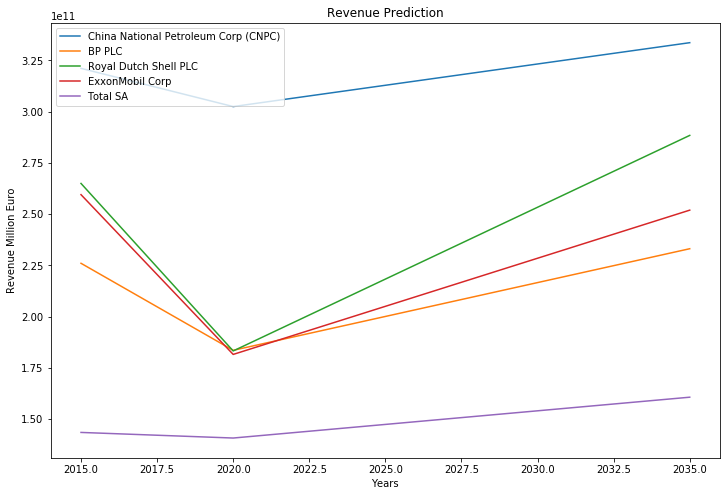

In [104]:
plt.figure(figsize=(12, 8))

for i in financials_2_visualize_T.columns[1:]: 
    plt.plot(financials_2_visualize_T['Year'],financials_2_visualize_T[i], label=i)
       
plt.title('Revenue Prediction')
    
plt.xlabel('Years')
plt.ylabel('Revenue Million Euro')

plt.legend(loc="upper left")
plt.show()

In [ ]:
#Emission_2035.to_excel('/Users/ilyasozgur/Desktop/Thesis/Models/Model_for_Thesis/Model_1/2035.xlsx')